In [3]:
# Import necessary libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os


# Load environment variables
load_dotenv()

# Get the password from the environment variable
SQL_PASSWORD = os.getenv("SQL_PASSWORD")


In [13]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password=SQL_PASSWORD)

# Create a cursor object
cursor = db_connection.cursor()

In [14]:
# Create the database
cursor.execute("CREATE DATABASE IF NOT EXISTS RetailSalesAnalysis;")
cursor.execute("USE RetailSalesAnalysis;")

**We are going to create tables for products, stores, employees, and sales.**


In [15]:
# Create tables
create_tables_query = """
CREATE TABLE IF NOT EXISTS Products (
    product_id INT PRIMARY KEY AUTO_INCREMENT,
    product_name VARCHAR(255) NOT NULL,
    category VARCHAR(255) NOT NULL,
    price DECIMAL(10, 2) NOT NULL
);

CREATE TABLE IF NOT EXISTS Stores (
    store_id INT PRIMARY KEY AUTO_INCREMENT,
    store_name VARCHAR(255) NOT NULL,
    location VARCHAR(255) NOT NULL
);

CREATE TABLE IF NOT EXISTS Employees (
    employee_id INT PRIMARY KEY AUTO_INCREMENT,
    employee_name VARCHAR(255) NOT NULL,
    store_id INT,
    FOREIGN KEY (store_id) REFERENCES Stores(store_id)
);

CREATE TABLE IF NOT EXISTS Sales (
    sale_id INT PRIMARY KEY AUTO_INCREMENT,
    product_id INT,
    store_id INT,
    employee_id INT,
    sale_date DATE,
    quantity_sold INT,
    total_sales DECIMAL(10, 2),
    FOREIGN KEY (product_id) REFERENCES Products(product_id),
    FOREIGN KEY (store_id) REFERENCES Stores(store_id),
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id)
);
"""

# Execute the create tables query
for statement in create_tables_query.strip().split(';'):
    if statement.strip():
        cursor.execute(statement)

**We are going to insert sample data into the tables.**

In [16]:
# Insert sample data into Products
insert_products_query = """
INSERT INTO Products (product_name, category, price) VALUES
('Apple iPhone 14', 'Electronics', 999.99),
('Samsung Galaxy S22', 'Electronics', 799.99),
('Sony WH-1000XM4', 'Accessories', 349.99),
('Nike Air Max 270', 'Footwear', 149.99),
('Adidas Ultraboost 21', 'Footwear', 179.99);
"""
cursor.execute(insert_products_query)

# Insert sample data into Stores
insert_stores_query = """
INSERT INTO Stores (store_name, location) VALUES
('Best Buy', 'New York, NY'),
('Walmart', 'Los Angeles, CA'),
('Target', 'Chicago, IL'),
('Foot Locker', 'Houston, TX');
"""
cursor.execute(insert_stores_query)

# Insert sample data into Employees
insert_employees_query = """
INSERT INTO Employees (employee_name, store_id) VALUES
('John Doe', 1),
('Jane Smith', 2),
('Emily Johnson', 3),
('Michael Brown', 4);
"""
cursor.execute(insert_employees_query)

# Insert sample data into Sales
insert_sales_query = """
INSERT INTO Sales (product_id, store_id, employee_id, sale_date, quantity_sold, total_sales) VALUES
(1, 1, 1, '2023-01-01', 10, 9999.90),
(2, 2, 2, '2023-01-02', 5, 3999.95),
(3, 1, 1, '2023-01-03', 7, 2449.93),
(4, 3, 3, '2023-01-04', 15, 2249.85),
(5, 4, 4, '2023-01-05', 8, 1439.92);
"""
cursor.execute(insert_sales_query)

# Commit the changes
db_connection.commit()

### Transform ETL 


In [17]:
# Create a view for daily sales
create_view_query = """
CREATE VIEW Daily_Sales AS
SELECT 
    sale_date,
    SUM(total_sales) AS total_sales,
    SUM(quantity_sold) AS total_quantity
FROM Sales
GROUP BY sale_date;
"""
cursor.execute(create_view_query)

**Run query to get total sales per store**

In [18]:
# Query: Get total sales per store
query_sales_per_store = """
SELECT 
    s.store_name,
    SUM(sa.total_sales) AS total_sales
FROM Sales sa
JOIN Stores s ON sa.store_id = s.store_id
GROUP BY s.store_name;
"""

# Execute the query
cursor.execute(query_sales_per_store)

# Fetch the results
results_sales_per_store = cursor.fetchall()

# Convert results to a DataFrame
df_sales_per_store = pd.DataFrame(results_sales_per_store, columns=['Store', 'Total Sales'])

# Display the DataFrame
df_sales_per_store.head()

,Store,Total Sales
0,Best Buy,12449.83
1,Walmart,3999.95
2,Target,2249.85
3,Foot Locker,1439.92


**Create view for employee performance**

In [19]:
# Create a view for employee performance
create_employee_performance_view = """
CREATE VIEW Employee_Performance AS
SELECT 
    e.employee_name,
    SUM(s.total_sales) AS total_sales,
    COUNT(s.sale_id) AS total_transactions
FROM Employees e
JOIN Sales s ON e.employee_id = s.employee_id
GROUP BY e.employee_name;
"""
cursor.execute(create_employee_performance_view)

**List all views**

In [21]:
# Query to list all views
query = "SHOW FULL TABLES IN RetailSalesAnalysis WHERE TABLE_TYPE LIKE 'VIEW';"

# Execute the query
cursor.execute(query)

# Fetch the results
views = cursor.fetchall()

# Convert results to a DataFrame for easier manipulation
df_views = pd.DataFrame(views, columns=['View Name', 'Table Type'])

# Display the DataFrame
df_views.head()

,View Name,Table Type
0,daily_sales,VIEW
1,employee_performance,VIEW


In [20]:
# Query to select all data from the Employee_Performance view
query = "SELECT * FROM Employee_Performance;"

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert results to a DataFrame for easier manipulation
df_employee_performance = pd.DataFrame(results, columns=['Employee Name', 'Total Sales', 'Total Transactions'])

# Display the DataFrame
df_employee_performance.head()

,Employee Name,Total Sales,Total Transactions
0,John Doe,12449.83,2
1,Jane Smith,3999.95,1
2,Emily Johnson,2249.85,1
3,Michael Brown,1439.92,1


In [25]:
cursor.close()
db_connection.close()

### Dashboards




In [26]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password=SQL_PASSWORD,
    database="RetailSalesAnalysis" 
)

# Create a cursor object
cursor = db_connection.cursor()

# Query to select all data from the Employee_Performance view
query = "SELECT * FROM Employee_Performance;"

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert results to a DataFrame for easier manipulation
df_employee_performance = pd.DataFrame(results, columns=['Employee Name', 'Total Sales', 'Total Transactions'])

# Close the cursor and connection
cursor.close()
db_connection.close()

/var/folders/ll/shvw45j9453b4qw8vpqdsk5r0000gn/T/ipykernel_7521/708287436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Employee Name', data=df_employee_performance, palette='viridis', ax=axes[0, 0])
/var/folders/ll/shvw45j9453b4qw8vpqdsk5r0000gn/T/ipykernel_7521/708287436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Transactions', y='Employee Name', data=df_employee_performance, palette='magma', ax=axes[0, 1])


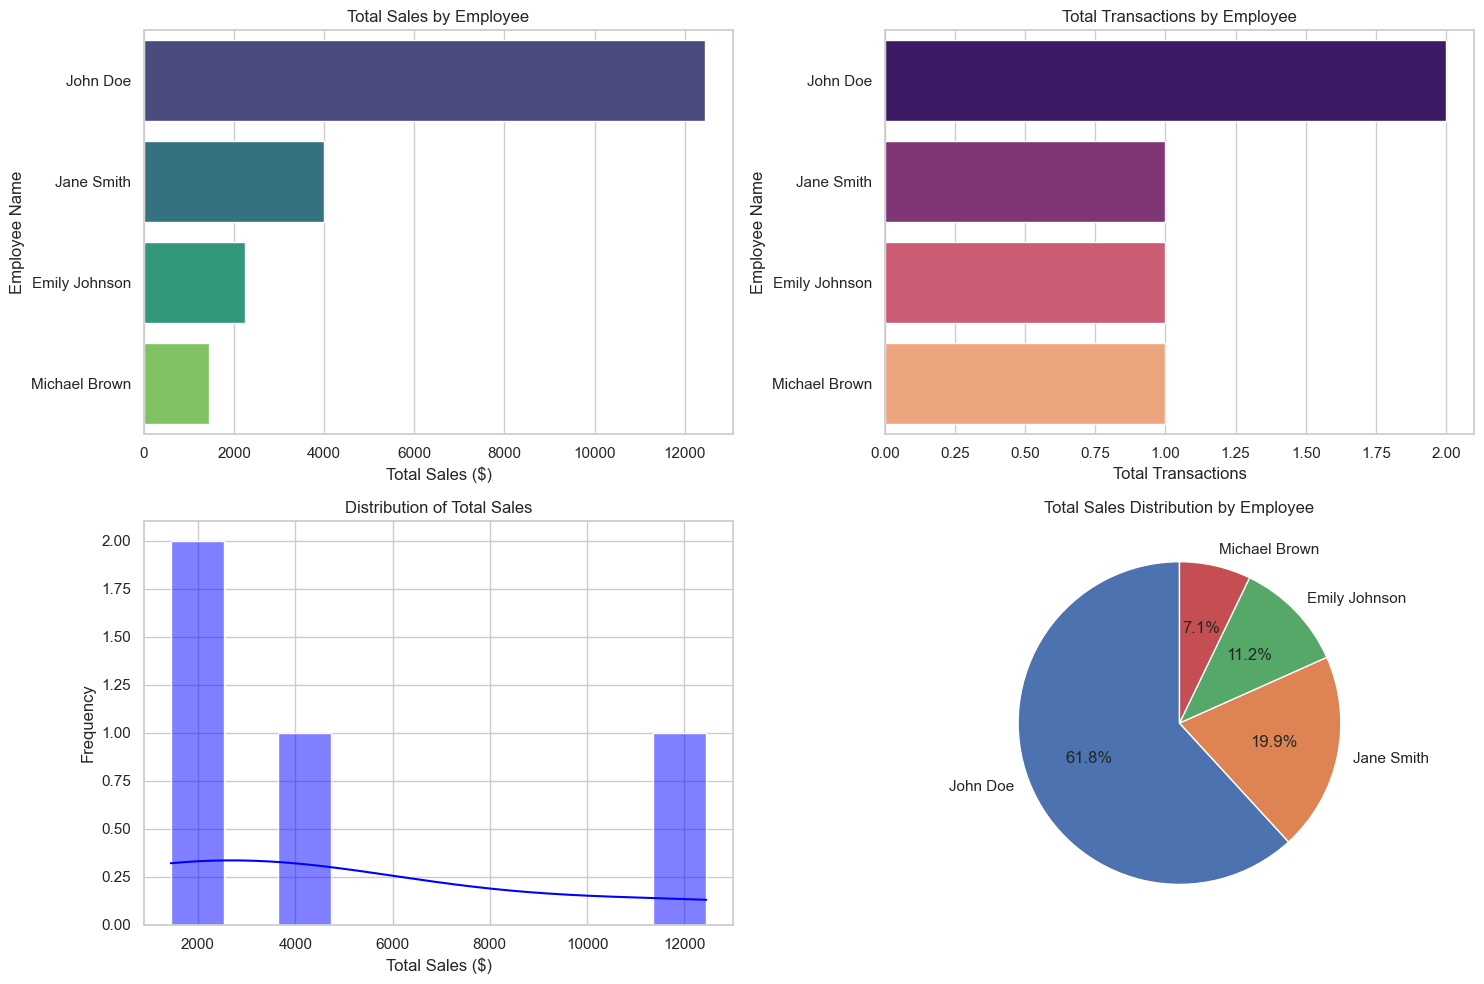

In [27]:
 # Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for Total Sales by Employee
sns.barplot(x='Total Sales', y='Employee Name', data=df_employee_performance, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Employee')
axes[0, 0].set_xlabel('Total Sales ($)')
axes[0, 0].set_ylabel('Employee Name')

# Bar plot for Total Transactions by Employee
sns.barplot(x='Total Transactions', y='Employee Name', data=df_employee_performance, palette='magma', ax=axes[0, 1])
axes[0, 1].set_title('Total Transactions by Employee')
axes[0, 1].set_xlabel('Total Transactions')
axes[0, 1].set_ylabel('Employee Name')

# Histogram for Total Sales Distribution
sns.histplot(df_employee_performance['Total Sales'], bins=10, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Sales')
axes[1, 0].set_xlabel('Total Sales ($)')
axes[1, 0].set_ylabel('Frequency')

# Pie chart for Total Sales by Employee
axes[1, 1].pie(df_employee_performance['Total Sales'], labels=df_employee_performance['Employee Name'], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Total Sales Distribution by Employee')

# Adjust layout
plt.tight_layout()
plt.show()


### Summary of Visualizations

1. **Total Sales by Employee (Bar Plot)**:


   - **Description**: Displays total sales generated by each employee.
   
   - **Significance**: Highlights top performers and identifies areas for improvement.  


2. **Total Transactions by Employee (Bar Plot)**:

   - **Description**: Shows the number of transactions completed by each employee.

   - **Significance**: Indicates employee activity levels and efficiency in converting transactions to sales.



2. **Total Transactions by Employee (Bar Plot)**:


   - **Description**: Shows the number of transactions completed by each employee.

   - **Significance**: Indicates employee activity levels and efficiency in converting transactions to sales.


3. **Distribution of Total Sales (Histogram)**:


   - **Description**: Illustrates the distribution of total sales amounts across employees.

   - **Significance**: Reveals patterns in sales performance and identifies outliers.

4. **Total Sales Distribution by Employee (Pie Chart)**:


   - **Description**: Visualizes the proportion of total sales contributed by each employee.

   - **Significance**: Clearly shows each employee's contribution to overall sales.
